In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from IPython.display import HTML, display

In [2]:
df = pd.read_csv("shareViewDataRM-ext.csv")

In [3]:
df.columns = df.columns.str.lstrip()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.head(35)

,activity_type,user_id,rm_id,user_os,viewing_app,view_app_group,user_groups,shared_date,shared_hour,shared_time,title_of_content,doc_type,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time
0,SHARE,5931852,197521.0,NaN,NaN,NaN,Client Solutions,18-Aug-2017,0.0,0:53:39,English/Writing GameScapes and Games,Folder,WEB,1,5505,18-Aug-2017,22:43:00
1,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Introductions and Conclusions: Set the Stage,Intro,NaN,1,285,18-Aug-2017,22:37:45
2,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,Parag,NaN,1,1635,18-Aug-2017,22:00:03
3,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,Parag,NaN,1,3555,18-Aug-2017,21:00:01
4,VIEW,5931852,NaN,WINDOWS_7,CHROME,CHROME,NaN,NaN,NaN,NaN,Paragraph Structure: Find the Balance,Parag,NaN,1,30,18-Aug-2017,20:59:28
5,SHARE,5864595,197521.0,NaN,NaN,NaN,Client Solutions,10-Aug-2017,3.0,3:27:06,English/Writing GameScapes and Games,Folder,WEB,1,1240,18-Aug-2017,20:56:00
6,VIEW,5864595,NaN,WINDOWS_7,IE11,IE11,NaN,NaN,NaN,NaN,Thesis Statements: What's the Point?,Thesi,NaN,1,5,18-Aug-2017,20:55:11
7,SHARE,5926033,197521.0,NaN,NaN,NaN,Client Solutions,17-Aug-2017,21.0,21:41:24,Business Foundations,Folder,WEB,0,0,17-Aug-2017,21:41:24
8,SHARE,3837716,197521.0,NaN,NaN,NaN,Client Solutions,17-Aug-2017,21.0,21:33:05,Business Foundations,Folder,WEB,1,51490,17-Aug-2017,21:33:05
9,VIEW,197521,NaN,WINDOWS_10,CHROME,CHROME,NaN,NaN,NaN,NaN,DEMO - Planning and Writing,DEMO,NaN,1,350,17-Aug-2017,3:11:48


# EDA & Feature Engineering

In [7]:
df.user_os.unique()


array([nan, 'WINDOWS_7', 'WINDOWS_10', 'MAC_OS_X', 'MAC_OS_X_IPHONE',
       'WINDOWS_XP', 'WINDOWS_81', 'ANDROID6', 'ANDROID_MOBILE',
       'CHROME_OS', 'MAC_OS_X_IPAD', 'ANDROID4_TABLET', 'WINDOWS_8',
       'iOS8_1_IPAD'], dtype=object)

In [8]:
df.rename(columns={'user_os': 'viewing_device'}, inplace=True)
df["viewing_device"].replace({"MAC_OS_X" : "Laptop/Desktop", "WINDOWS_XP" : "Laptop/Desktop", "WINDOWS_8" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_7" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "CHROME_OS" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS8_1_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)

In [9]:
df.viewing_app.unique()

array([nan, 'CHROME', 'IE11', 'SAFARI', 'EDGE', 'FIREFOX', 'EDGE14',
       'EDGE13', 'EDGE12', 'MOBILE_SAFARI', 'CHROME49', 'FIREFOX34',
       'CHROME45', 'CHROME_MOBILE', 'SAFARI9', 'SAFARI5', 'FIREFOX48',
       'CHROME48', 'FIREFOX46', 'CHROME41', 'CHROME28'], dtype=object)

In [10]:
df.rename(columns={'viewing_app': 'browser'}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME49" : "CHROME", "CHROME41" : "CHROME", "CHROME48" : "CHROME", "CHROME28" : "CHROME", "FIREFOX34" : "FIREFOX", "FIREFOX46" : "FIREFOX", "FIREFOX48" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "SAFARI5" : "SAFARI", "SAFARI9" : "SAFARI"}, inplace=True)
df.browser.unique()

array([nan, 'CHROME', 'IE11', 'SAFARI', 'EDGE', 'FIREFOX', 'MOBILE_SAFARI',
       'CHROME_MOBILE'], dtype=object)

In [11]:
df["shared_date"] = pd.to_datetime(df["shared_date"], format="%d-%b-%Y")

In [12]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [13]:
df['weekday'] = df['last_activity_date'].dt.dayofweek
df["weekday_name"] = df['last_activity_date'].dt.weekday_name
df["month"] = df['last_activity_date'].dt.month
df["time_of_day"] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [14]:
# 1: Night(Midnight to 6 am), 2: Morning(6 am to Noon), 3: Afternoon(Noon to 6 pm), 4: Evening(6 pm to Midnight)
df["time_of_day"].replace({0 : 3, 1 : 3, 2 : 3, 3 : 3, 4 : 3, 5 : 3}, inplace = True)
df["time_of_day"].replace({6 : 4, 7 : 4, 8 : 4, 9 : 4, 10 : 4, 11 : 4}, inplace = True)
df["time_of_day"].replace({12 : 1, 13 : 1, 14 : 1, 15 : 1, 16 : 1, 17 : 1}, inplace = True)
df["time_of_day"].replace({18 : 2, 19 : 2, 20 : 2, 21 : 2, 22 : 2, 23 : 2}, inplace = True)
df.time_of_day.unique()

array([2, 3, 1, 4])

In [15]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [16]:
df.viewed.unique()

array([1, 0])

In [17]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [18]:
hour_grouped = df.groupby("time_of_day")["time_spent_mins"].sum()

In [19]:
# plot = plt.bar(xrange(0,4),(df.groupby("time_of_day")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])


In [20]:
#sns.distplot(df["time_spent_mins"], color="m")
len(df)

2463

1693

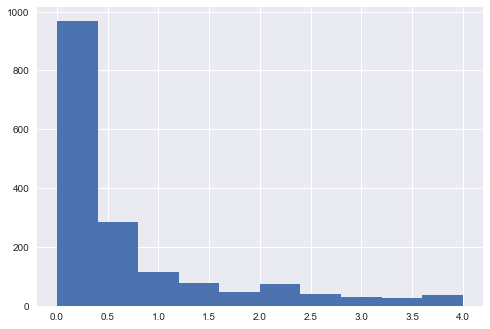

In [21]:
df = df[df["time_spent_mins"] <= 4]
plot = plt.hist(df["time_spent_mins"])
#plt.boxplot(new_df["time_spent_mins"])

len(df) 
# 1917 (22% reduced)
#sns.distplot(new_df["time_spent_mins"], color="g")

In [22]:
temp = 0
for index, row in df.iterrows():
    if row["activity_type"] == "SHARE":
        temp = row["shared_date"]
    else:
        if temp == 0:
            row["shared_date"] = row["last_activity_date"]
        else:
            row["shared_date"] = temp         

In [23]:
df['num_of_day_from_share_view'] = (df["last_activity_date"] - df["shared_date"]).astype(dt.timedelta).map(lambda x: 0 if pd.isnull(x) else x.days)


In [24]:
df = df[df['num_of_day_from_share_view']<2]

In [25]:
len(df)

1676

# SHARE DATA ANALYSIS

In [26]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'view_app_group', u'user_groups', u'shared_date', u'shared_hour',
       u'shared_time', u'title_of_content', u'doc_type', u'share_channel',
       u'viewed', u'time_spent_in_seconds', u'last_activity_date',
       u'last_activity_time', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [64]:
len(share_df.rm_id.unique()), len(share_df)/float(len(share_df.rm_id.unique()))

(10, 16.3)

In [27]:
y_time_spent = share_df.groupby("weekday")["time_spent_mins"].sum()

<Container object of 7 artists>

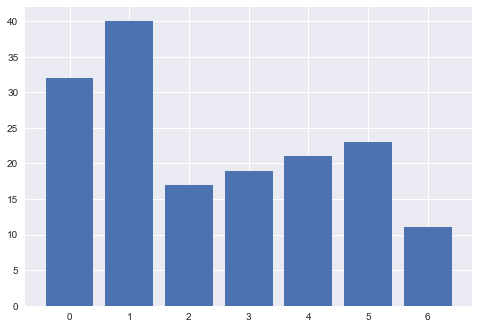

In [61]:
plt.bar(xrange(0,len(share_df.groupby("month")["rm_id"].count())), share_df.groupby("month")["rm_id"].count())

In [28]:
#sns.stripplot(x=share_df["weekday_name"], y=share_df["time_spent_mins"], data=share_df, jitter=True)

In [29]:
len(share_df), len(share_df.user_id.unique())

(163, 123)

In [60]:
from collections import Counter
user_id_list_sh = [j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE"]
num_shares_dict = Counter(user_id_list_sh)
num_shares_dict
# num_shares = [v for k,v in num_shares_dict.iteritems()]
# len(num_shares),plt.hist(num_shares)

Counter({197521.0: 30,
         205963.0: 17,
         211675.0: 14,
         228993.0: 2,
         229551.0: 57,
         230605.0: 1,
         346016.0: 11,
         2978304.0: 6,
         3500356.0: 12,
         5538419.0: 13})

In [31]:
# sns.distplot(share_df["num_of_day_from_share_view"], color="m")

(array([ 161.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

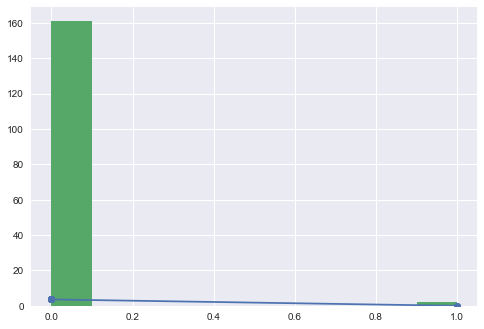

In [32]:
import pylab as pl
h = sorted(share_df["num_of_day_from_share_view"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)

In [33]:
share_df.describe()

,user_id,rm_id,shared_hour,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3.786921e+06,9.929029e+05,10.122699,0.472393,26.349693,2.711656,4.429448,2.515337,9.926380,0.439162,0.012270
std,2.030893e+06,1.657973e+06,8.169329,0.500776,45.958185,1.443264,1.962517,0.918640,8.197077,0.765970,0.110427
min,1.975210e+05,1.975210e+05,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1.798722e+06,2.059630e+05,2.000000,0.000000,0.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
50%,4.897825e+06,2.295510e+05,9.000000,0.000000,0.000000,3.000000,4.000000,3.000000,8.000000,0.000000,0.000000
75%,5.106435e+06,3.460160e+05,19.000000,1.000000,34.000000,4.000000,6.000000,3.000000,19.000000,0.566667,0.000000
max,5.926033e+06,5.538419e+06,23.000000,1.000000,238.000000,6.000000,8.000000,4.000000,23.000000,3.966667,1.000000


<module 'pylab' from '/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/pylab.pyc'>

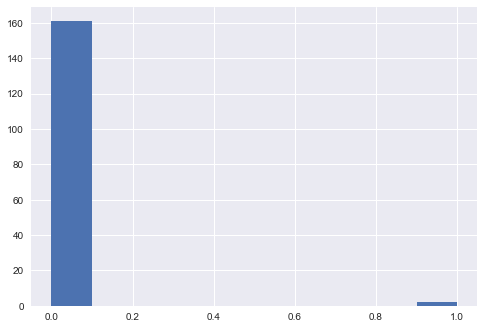

In [34]:
import pylab as pl
days_share_view = share_df[share_df["num_of_day_from_share_view"]<=7]
len(share_df),len(days_share_view)
h = sorted(days_share_view["num_of_day_from_share_view"]) #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

pl.hist(h)
pl

In [35]:
len(share_df),len(days_share_view)

(163, 163)

In [36]:
# uniq_titles = np.sort(share_df.title_of_content.unique())
# uniq_title_num_share = share_df.groupby("title_of_content")["activity_type"].count()
# #uniq_titles 
# uniq_title_num_share

In [37]:
# import pylab as pl
# h = sorted(share_df["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

# pl.hist(h,normed=True)


In [38]:
#share_df["weekday"].plot.kde()

In [39]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
# share_weekday = share_df.groupby("weekday")["time_spent_mins"].sum()

In [40]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("month")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [41]:
# import pylab as pl
# new_share = share_df[share_df["time_spent_mins"]<=8]
# h = sorted(new_share["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')
# pl.axvline(x=np.mean(h)+np.std(h),color='r', linestyle='--')
# pl.axvline(x=np.mean(h)-np.std(h),color='r', linestyle='--')
# pl.hist(h,normed=True)


In [42]:
#h = plt.hist(share_df.time_spent_mins)

In [43]:
#sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)
df.share_channel.unique()
share_df.share_channel.unique()

array(['WEB', 'ANDROID'], dtype=object)

([<matplotlib.axis.XTick at 0x111e7df50>,
 <a list of 2 Text xticklabel objects>)

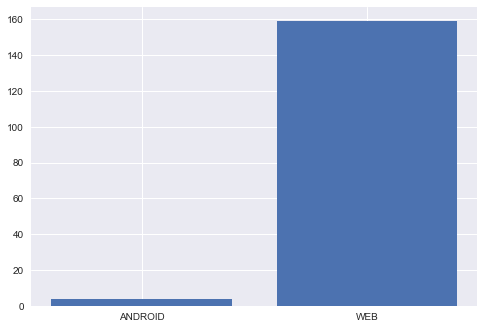

In [44]:
plt.bar(xrange(0,2),(share_df.groupby("share_channel")["time_spent_mins"].count()))
plt.xticks(xrange(0,2),["ANDROID","WEB"])
# plt.xlabel("Share Channel")
# plt.ylabel("Number of Shares")
# plt.title("TW - Num Shares Vs Share Channel")

In [45]:
#sns.stripplot(x="time_of_day", y="time_spent_mins", data=share_df)


# VIEW DATA ANALYSIS

In [46]:
view_df = df[(df.activity_type == "VIEW")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id"], axis =1)
view_df.describe()

,user_id,shared_hour,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,1.513000e+03,0.0,1513.0,1513.000000,1513.000000,1513.000000,1513.000000,1513.00000,1513.000000,1513.0
mean,3.204268e+06,NaN,1.0,42.126900,2.678123,3.922009,2.815598,9.69002,0.702115,0.0
std,2.098783e+06,NaN,0.0,55.199576,1.781416,1.471240,0.874972,7.91078,0.919993,0.0
min,1.975210e+05,NaN,1.0,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,0.0
25%,2.295510e+05,NaN,1.0,5.000000,1.000000,3.000000,2.000000,3.00000,0.083333,0.0
50%,4.369851e+06,NaN,1.0,17.000000,3.000000,4.000000,3.000000,7.00000,0.283333,0.0
75%,4.931977e+06,NaN,1.0,50.000000,4.000000,5.000000,3.000000,19.00000,0.833333,0.0
max,5.931852e+06,NaN,1.0,240.000000,6.000000,8.000000,4.000000,23.00000,4.000000,0.0


In [65]:
len(view_df), len(view_df.user_id.unique()),len(share_df)

(1513, 183, 163)

In [48]:
view_df.columns

Index([u'activity_type', u'user_id', u'viewing_device', u'browser',
       u'view_app_group', u'shared_hour', u'title_of_content', u'doc_type',
       u'viewed', u'time_spent_in_seconds', u'last_activity_date',
       u'last_activity_time', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [62]:
views_per_share = len(view_df)/float(len(share_df))
views_per_share

9.282208588957054

In [49]:
len(view_df.title_of_content.unique())


332

(array([ 855.,  258.,  103.,   72.,   40.,   67.,   36.,   25.,   23.,   34.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

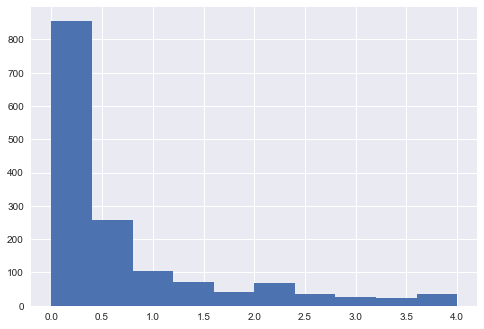

In [50]:
plt.hist(view_df["time_spent_mins"])

(array([    0.,     0.,     0.,     0.,     0.,  1513.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

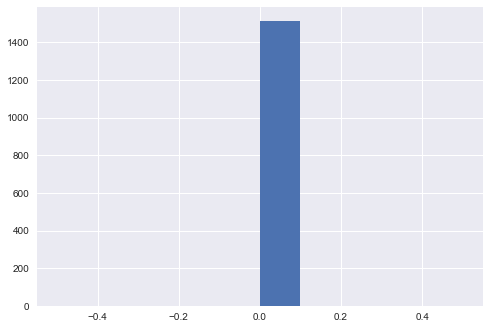

In [51]:
plt.hist(view_df["num_of_day_from_share_view"])

# NEW ANALYSIS -- Start

In [52]:
from collections import Counter
user_id_list = [j.user_id for i,j in df.iterrows() if j["activity_type"] == "VIEW"]
num_views = Counter(user_id_list)
best, views = {}, []
#best = sorted(num_views, key=lambda x : num_views[x])
for k,v in num_views.iteritems():
    if v<=20:
        best[k] = v
        views.append(v)


In [53]:
len(num_views), len(best), 

(183, 167)

(array([ 164.,   12.,    2.,    3.,    0.,    1.,    0.,    0.,    0.,    1.]),
 array([   1.,   20.,   39.,   58.,   77.,   96.,  115.,  134.,  153.,
         172.,  191.]),
 <a list of 10 Patch objects>)

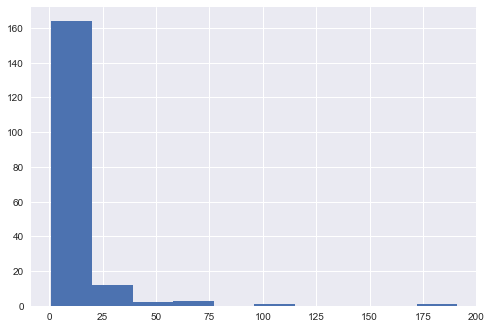

In [54]:
plt.hist([num_views[i] for i,j in num_views.iteritems() if num_views[i]>0])

In [55]:
best, len(best)

({205963: 13,
  207131: 5,
  211675: 10,
  230605: 13,
  268228: 4,
  294943: 1,
  346016: 7,
  474895: 2,
  512832: 1,
  1389531: 2,
  1557433: 3,
  1657717: 1,
  1744956: 1,
  1762318: 1,
  1835127: 7,
  1904675: 5,
  1944078: 1,
  1984750: 3,
  1985348: 1,
  2118564: 1,
  2241865: 4,
  2264676: 2,
  2266502: 1,
  2609840: 1,
  2639930: 5,
  2906142: 2,
  2921824: 2,
  2978059: 4,
  2978304: 6,
  3126549: 4,
  3221479: 1,
  3322140: 5,
  3371711: 6,
  3500356: 1,
  3638233: 1,
  3644461: 1,
  3644595: 1,
  3998761: 1,
  3999937: 1,
  4013955: 1,
  4014001: 1,
  4014636: 2,
  4014648: 2,
  4014682: 3,
  4014689: 1,
  4014757: 1,
  4014763: 2,
  4350620: 1,
  4350631: 1,
  4350664: 1,
  4350703: 1,
  4350709: 3,
  4350715: 1,
  4350727: 1,
  4350733: 1,
  4365931: 3,
  4369793: 14,
  4369805: 3,
  4369818: 10,
  4369826: 15,
  4369833: 16,
  4369845: 20,
  4369851: 15,
  4369864: 9,
  4369889: 17,
  4369919: 1,
  4369925: 19,
  4388760: 4,
  4397415: 1,
  4647485: 2,
  4773993: 2,
  47

(array([ 94.,  35.,   9.,   3.,   6.,   1.,   5.,   5.,   5.,   4.]),
 array([  1. ,   2.9,   4.8,   6.7,   8.6,  10.5,  12.4,  14.3,  16.2,
         18.1,  20. ]),
 <a list of 10 Patch objects>)

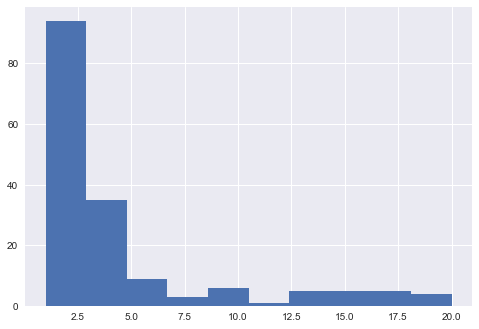

In [56]:
plt.hist(views)

In [57]:
conv_ids = []
for k,v in num_views.iteritems(): 
    if v>14 and v<20:
        conv_ids.append(k)
conv_ids, len(conv_ids)

([4369925,
  5213743,
  4931985,
  4931956,
  4369826,
  4932006,
  4369833,
  4369851,
  4932048,
  5519325,
  4369889],
 11)

In [58]:
view_df["conv_id"] = view_df["viewed"]
test_df = view_df
conv_df = pd.DataFrame()
for i in xrange(len(conv_ids)):
    temp_df = view_df[view_df["user_id"] == conv_ids[i]]
    conv_df = conv_df.append(temp_df)
    test_df.drop(test_df["user_id"] == conv_ids[i])
    

ValueError: labels [False False False ..., False False False] not contained in axis

In [ ]:
conv_df.describe()

In [ ]:
test_df["conv_id"].replace({1:0}, inplace= True)
for k,v in num_views.iteritems():
    test_df.loc[test_df['user_id'] == k, 'num_of_views'] = v
    test_df.loc[test_df['user_id'] == k, 'total_time_mins'] = test_df[test_df["user_id"] == k]["time_spent_mins"].sum()

test_df.weekday_name.replace({0:"Sunday", 1:"Monday"}, inplace= True)
test_df.head()

In [ ]:
test_df = view_df.append(conv_df)
test_df["weekday_name"].unique()

In [ ]:
test_df

In [ ]:
dummies = pd.get_dummies(test_df, columns=["viewing_device", "weekday_name", "time_of_day", "browser"])

In [ ]:
test_df = pd.concat([test_df, dummies])
test_df = test_df.drop(["viewing_device", "weekday_name", "time_of_day", "browser"], axis=1)
test_df.columns

In [ ]:
conv_df.title_of_content.unique()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
test_df.dropna(how= "any", inplace= True)
len(test_df)
x = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI'])
y = test_df.as_matrix(columns= ["time_spent_mins"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model.predict(x_test)
Model.score(x_test,y_test), Model.coef_

In [ ]:
test_df.dropna(how= "any", inplace= True)
len(test_df)
x1 = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI', "time_spent_mins"])
y1 = test_df.as_matrix(columns= [u'conv_id'])

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1)

In [ ]:
Model1 = LogisticRegression()
Model1.fit(x1_train, y1_train)
Model1.predict(x1_test)
Model1.score(x1_test,y1_test), Model1.coef_

In [ ]:
len(conv_df)

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("browser")["time_spent_mins"].count())), conv_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
plt.bar(xrange(0,4), conv_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Morning", "Afternoon", "Evening", "Night"])

In [ ]:
plt.bar(xrange(0,3), conv_df.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
#### import pylab as pl
new_view = view_df[view_df["time_spent_mins"] <= 6]
len(new_view) #(20 mins, 1874/2085, 10% reduced) (12 mins, 1746/2085, 16% reduced)(6 mins, 1607/2085, 23% reduced)
# (4 mins, 1513/2085, 28% reduced)

h = sorted(new_view["time_spent_mins"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, normed= True)

pl.axvline(x = np.mean(h), linestyle='--')
pl.axvline(x = np.mean(h) + np.std(h), linestyle='--')
pl.axvline(x = np.mean(h) + 2*np.std(h), linestyle='--')


In [ ]:
new_view.describe()

In [ ]:
plt.hist(new_view["time_spent_mins"])

In [ ]:
sorted(view_df.browser.unique())

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), view_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])
# plt.xlabel("Viewing Application")
# plt.ylabel("Total View Time in Minutes")
# plt.title("Time Spent Vs View App")

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), new_view.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,4), view_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])
# plt.xlabel("Time of Day")
# plt.ylabel("Total View Time in Minutes")
# plt.title("TW - Time Spent Vs Time of Day")

In [ ]:
plt.bar(xrange(0,4), new_view.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
#plt.xlabel("Day of Week")
#plt.ylabel("Total View Time in Minutes")
#plt.title("TW - Time Spent Vs Day of Week")

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
# Get the time spent on different apps
# def get_time_spent(view_df):
#     time_spent_secs = view_df["time_spent_in_seconds"].sum()
#     view_apps = view_df["view_app_group"].unique()

#     time_spent_dict = {}
#     for v in view_apps:
#         temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
#         time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
#     return time_spent_dict

# get_time_spent(view_df)

In [ ]:
plt.bar(xrange(0,3), view_df.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
#sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [ ]:
#plt.bar(xrange(0,9),view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


In [ ]:
#sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
# clusterer = KMeans(n_clusters=7, random_state=10)
# clusterer.fit(X)

